# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

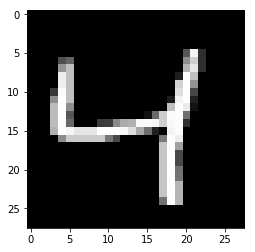

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, [None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="outputs")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6857
Epoch: 1/20... Training loss: 0.6813
Epoch: 1/20... Training loss: 0.6758
Epoch: 1/20... Training loss: 0.6698
Epoch: 1/20... Training loss: 0.6628
Epoch: 1/20... Training loss: 0.6542
Epoch: 1/20... Training loss: 0.6436
Epoch: 1/20... Training loss: 0.6330
Epoch: 1/20... Training loss: 0.6165
Epoch: 1/20... Training loss: 0.6070
Epoch: 1/20... Training loss: 0.5889
Epoch: 1/20... Training loss: 0.5735
Epoch: 1/20... Training loss: 0.5572
Epoch: 1/20... Training loss: 0.5408
Epoch: 1/20... Training loss: 0.5223
Epoch: 1/20... Training loss: 0.5036
Epoch: 1/20... Training loss: 0.4859
Epoch: 1/20... Training loss: 0.4655
Epoch: 1/20... Training loss: 0.4521
Epoch: 1/20... Training loss: 0.4332
Epoch: 1/20... Training loss: 0.4188
Epoch: 1/20... Training loss: 0.4041
Epoch: 1/20... Training loss: 0.3900
Epoch: 1/20... Training loss: 0.3745
Epoch: 1/20... Training loss: 0.3662
E

Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1859
E

Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1643
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1560
E

Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1386
E

Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1217
E

Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1178
E

Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.0981
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1072
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1004
E

Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0961
E

Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0974
E

Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0939
E

Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.1008
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0882
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

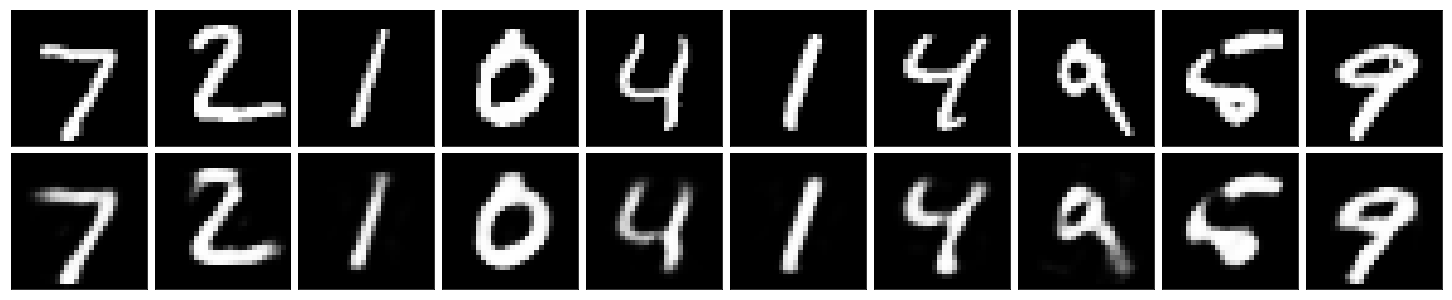

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.